# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Unsupervised learning, projections of multivariate data

## Task 1: Read and visualize spectral data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

The data-file `liver-spectroscopy.tab` is a text file which contains a Near Infrared Spectral (NIR) measurements of different cells from a liver. The file includes 731 samples, and each one has 234 variables. The variables describes the amount of infrared radiation absorbed in each of the tested 234 wavelengths. The last column in the data is the cell type, which can be one of the four types: 'collagen', 'glycogen', 'lipids' or 'DNA'. The column names are the wavelengths used in measuring the absorbtion values for the specific columns.

The data file is in text format, in which the columns are separated by tab-characters. 

The first task is to read the data file into a pandas dataframe called `D`. Use pandas function `.read_table()` for reading it.

In [76]:
#READ TABLE FUNCTION
data_file_path = "liver-spectroscopy.tab"

D = pd.read_table(data_file_path, sep="\t")

# CHECK FIRST ROWS
print(D.head())


   1801.264  1797.407  1793.55  1789.693  1785.836  1781.979  1778.121  \
0     0.117     0.118    0.119     0.118     0.118     0.118     0.119   
1     0.123     0.124    0.124     0.122     0.121     0.121     0.121   
2     0.098     0.099    0.100     0.099     0.099     0.099     0.099   
3     0.097     0.098    0.098     0.097     0.096     0.096     0.096   
4     0.115     0.116    0.117     0.117     0.116     0.117     0.118   

   1774.264  1770.407  1766.55  ...  933.4174  929.5602  925.7032  921.8461  \
0     0.121     0.122    0.122  ...     0.222     0.221     0.220     0.218   
1     0.122     0.123    0.121  ...     0.194     0.192     0.190     0.188   
2     0.101     0.102    0.101  ...     0.240     0.240     0.239     0.238   
3     0.097     0.098    0.097  ...     0.231     0.230     0.229     0.226   
4     0.121     0.122    0.121  ...     0.225     0.225     0.224     0.223   

   917.989  914.1319  910.2748  906.4177  902.5606      type  
0    0.215     0.

In [ ]:
assert('D' in globals()), \
    print("Use name D for NIR data, please.")    
assert(type(D)==pd.DataFrame)

assert(D.shape==(731,235)), "The shape of the data matrix is not quite right. Try to read it again"


Then visualize the spectral data by carrying out the following steps
1. Parse the `type` column as categorical value vector called `types` using function `pd.Categorical()`
1. Delete the original column 'type' from the dataframe (`del D['type']`)
1. parse the column names (`D.columns`) into a numerical vector of wavelengts, and name it as `wl`. You may find the `map()` function usefull for this purpose. Check from the last exercise how it was used. Round the wavelengths to integers, if you find a way to do that, but you can also used it as floating point values.
1. Assing the parsed `wl` vector as new column names of D (you can just assign it to `D.columns`)
1. Plot the first 10 samples. Select the first ten rows using `D.iloc[]`, and plot the transpose of them, using a transpose operator `.T`, as follows `D.iloc[].T.plot()`. Transpose is needed, because the plot function always places the row index in the x-axis. If the dataframe is first transposed, the column index (the wavelengths) becomes the row index, and plot will be correct.

You can also use `plt.xlabel()` and `plt.ylabel()` -functions to define labels for x- and y-axes.

The result should look like this:
![spectra](spectra.png)


['collagen', 'collagen', 'collagen', 'collagen', 'collagen', ..., 'DNA', 'DNA', 'DNA', 'DNA', 'DNA']
Length: 731
Categories (4, object): ['DNA', 'collagen', 'glycogen', 'lipids']
[1801, 1797, 1793, 1789, 1785, 1781, 1778, 1774, 1770, 1766, 1762, 1758, 1754, 1751, 1747, 1743, 1739, 1735, 1731, 1727, 1724, 1720, 1716, 1712, 1708, 1704, 1700, 1697, 1693, 1689, 1685, 1681, 1677, 1673, 1670, 1666, 1662, 1658, 1654, 1650, 1646, 1643, 1639, 1635, 1631, 1627, 1623, 1619, 1616, 1612, 1608, 1604, 1600, 1596, 1592, 1589, 1585, 1581, 1577, 1573, 1569, 1565, 1562, 1558, 1554, 1550, 1546, 1542, 1538, 1535, 1531, 1527, 1523, 1519, 1515, 1511, 1508, 1504, 1500, 1496, 1492, 1488, 1484, 1481, 1477, 1473, 1469, 1465, 1461, 1457, 1454, 1450, 1446, 1442, 1438, 1434, 1430, 1427, 1423, 1419, 1415, 1411, 1407, 1403, 1400, 1396, 1392, 1388, 1384, 1380, 1376, 1373, 1369, 1365, 1361, 1357, 1353, 1349, 1346, 1342, 1338, 1334, 1330, 1326, 1322, 1319, 1315, 1311, 1307, 1303, 1299, 1295, 1292, 1288, 1284, 1280, 1276

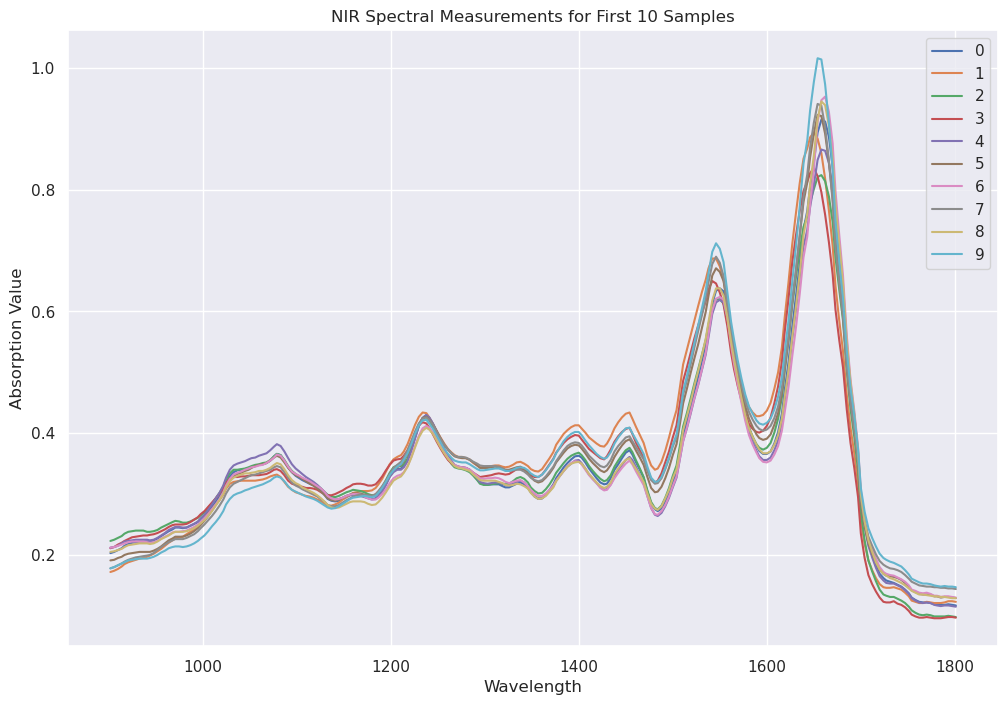

In [84]:
#1
D = pd.read_table('liver-spectroscopy.tab')

types = pd.Categorical(D['type'])
print(types)

#2 DELETE "TYPE" FROM DATAFRAME
del D['type']

#3 PARSE COLUMNS INTO A NUMERICAL VECTOR
wl = list(map(lambda x: int(float(x)), D.columns))
print(wl)

#4
D.columns = wl

#5 PLOT 10 FIRST SAMPLES
D.iloc[:10].T.plot(figsize=(12,8))

# LABEL THE AXES
plt.xlabel('Wavelength')
plt.ylabel('Absorption Value')
plt.title('NIR Spectral Measurements for First 10 Samples')
plt.grid(True)
plt.show()


In [ ]:
assert(type(types)==pd.Categorical)
assert(len(types)==731)
assert(len(wl)==234)
assert(D.shape==(731,234))


## Task 2, calculate PCA projection and visualize

Apply PCA to the dataframe `D` and plot how much variance is explained by the first 10 principal components. Store the transformed `D` as variable `projectedD`.

Store the explained variance ratio in variable `varexp`

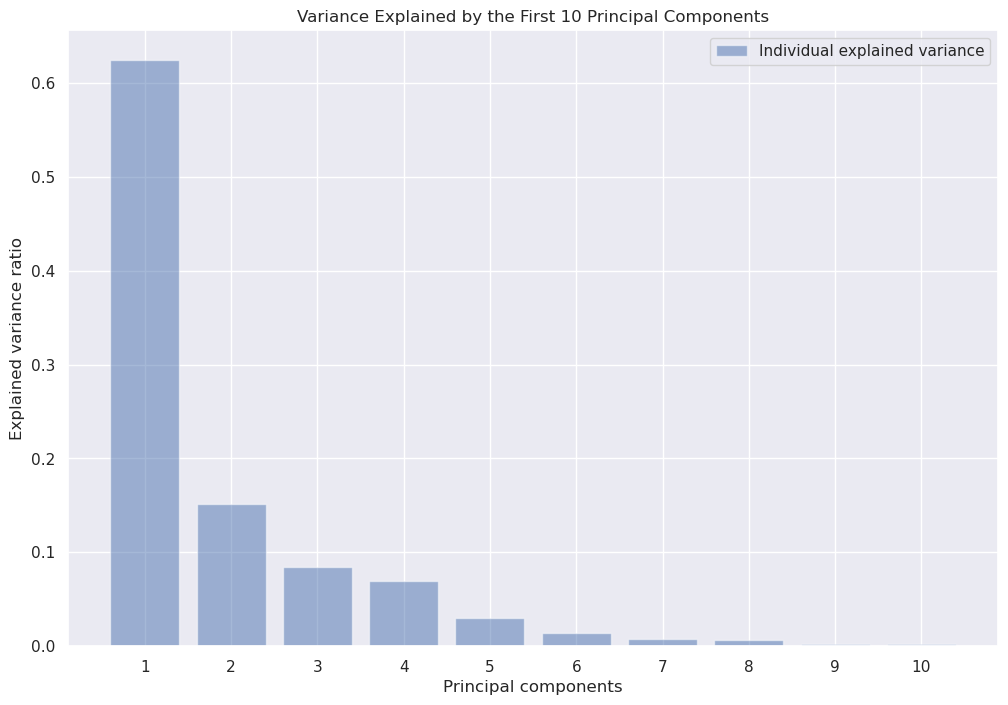

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
D_standardized = scaler.fit_transform(D)

pca = PCA(n_components=10)  # 10 FIRST PRINCIPAL COMPONENTS
projectedD = pca.fit_transform(D_standardized)

varexp = pca.explained_variance_ratio_
plt.figure(figsize=(12, 8))
plt.bar(range(1, 11), varexp, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, 11))
plt.title('Variance Explained by the First 10 Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
assert('varexp' in globals()), \
    print("Use the name varexp for storing the explained variance ratio, please.")
assert(projectedD.shape==(731,10))


How many PCA components you would select if you need to explain at least 90% of the variance of the data?
Answer by assigning correct value to n below.

In [80]:

cumulative_variance = pca.explained_variance_ratio_.cumsum()

n = (cumulative_variance < 0.90).sum() + 1


In [ ]:
assert('n' in globals()), \
    print("Use the name n for the number of principal components needed, please.")


### Visualize the data in PCA domain

Plot a scatter plot of two first principal components. Since `projectedD` is a numpy array and not a DataFrame, use the plotting function  `plt.scatter()`. The function requires two parameters, x-data and y-data, but some others are also usefull:
1. The first parameter is the x-data, give it the first principal compoent
1. The second parameter is the y-data, give it the second principal component
1. Give the class category for point colors `c=types.codes` 
1. Use the colormap parameter to use better colormap, e.g. `cmap='rainbow'`
1. Use rather small point size e.g. `s=10`
1. Make points somewhat transparent `alpha=0.5`

You can also use `plt.xlabel()` and `plt.ylabel()` functions to provide names for x and y axes, and `plt.colorbar()` to plot the colorbar explaining the meaning of the colors.
The plot should look like the following:

![pca](pca.png)

Notice that the different tissue types are clearly different already in two dimensional space.

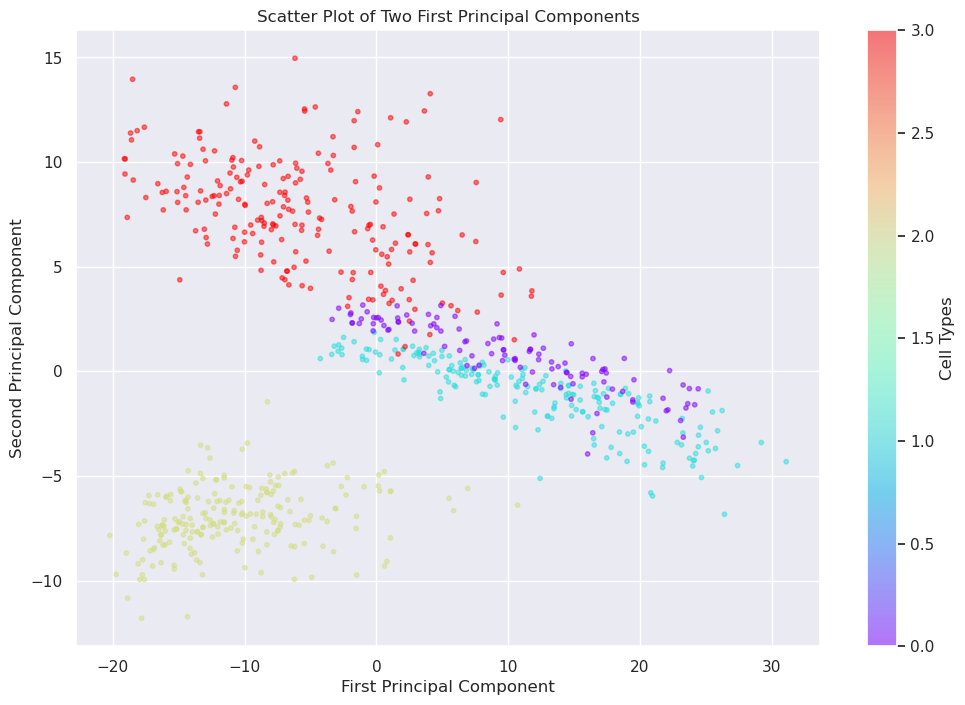

In [81]:
x_data = projectedD[:, 0]
y_data = projectedD[:, 1]

# CREATE A SCATTER PLOT
plt.figure(figsize=(12, 8))
sc = plt.scatter(x_data, y_data, c=types.codes, cmap='rainbow', s=10, alpha=0.5)

# NAME LABELS
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(sc, label='Cell Types')
plt.title('Scatter Plot of Two First Principal Components')
plt.grid(True)
plt.show()


## Task 3, calculate UMAP manifold projection and visualize

Repeat the previously made projection using UMAP and visualize it. Save your UMAP projected data as `umapD`. You can use just two components for UMAP.

The result could look like the following t-SNE projection plot.

![tsne](tsne.png)


/opt/tljh/user/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


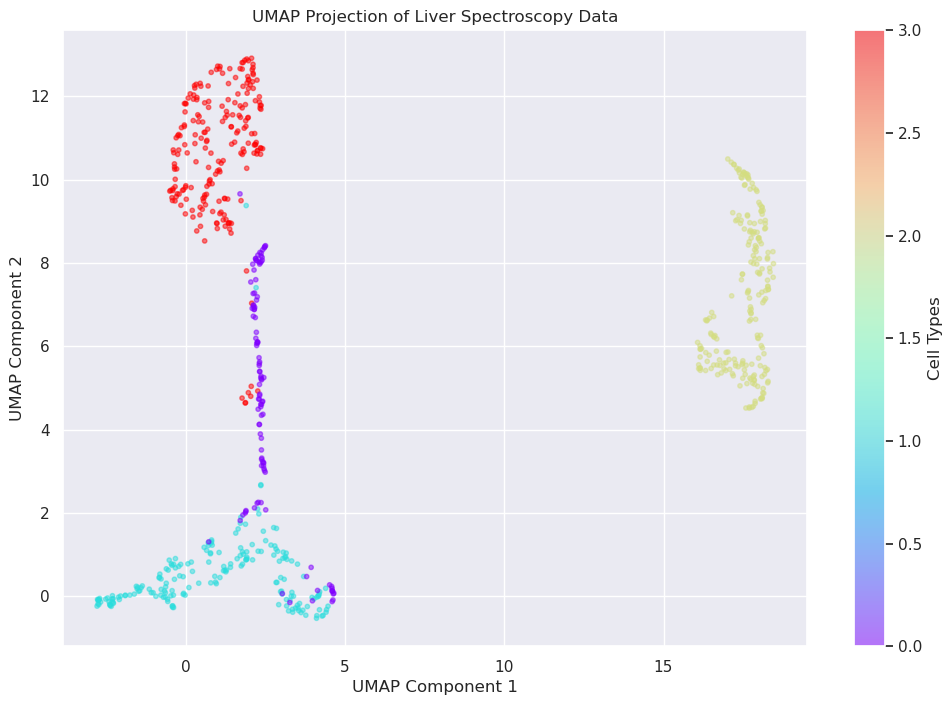

In [82]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
umapD = reducer.fit_transform(D_standardized)

plt.figure(figsize=(12, 8))
sc = plt.scatter(umapD[:, 0], umapD[:, 1], c=types.codes, cmap='rainbow', s=10, alpha=0.5)

# NAME LABELS
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(sc, label='Cell Types')
plt.title('UMAP Projection of Liver Spectroscopy Data')
plt.grid(True)
plt.show()

In [ ]:
assert(umapD.shape==(731,2))